#Lab 1 PCA - Dawid Białka

#Zad 1

In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv('./nyt-frame.csv', header = 0)
labels = df["class.labels"]
data = df.iloc[:,9:]
array = data.values

#Zad 2

In [3]:
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
sample_word

array(['filter', 'older', 'single', 'professional', 'tenure', 'efforts',
       'decided', 'windows', 'committed', 'now', 'dinner', 'joke',
       'happy', 'seriousness', 'banks', 'quite', 'embody', 'performed',
       'wish', 'poor'], dtype='<U16')

#Zad 3

In [4]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(array)

#Zad 4, 5, 6
W pierwszym komponencie najmniejsze wartości są dla elementów związanych z sztuką muzyczno-teatralną - music, trio, theater, orchestra. Największe wartości są związane z zwrotami oznaczającymi osobę (w tym przypadku kobiętę, mamy she, her, ms, mother)

In [19]:
first_component = pca.components_[0]
attributes = df.iloc[:,9:].columns.values
sorted = list(np.argsort(first_component))
for i in range(15):
    print(attributes[sorted[i]], first_component[sorted[i]])
sorted.reverse()
print("-------------")
for i in range(15):
    print(attributes[sorted[i]], first_component[sorted[i]])

music -0.11211617341838409
trio -0.08780731643381659
theater -0.07404600988801353
orchestra -0.06926899826753323
composers -0.05859060967058628
opera -0.055553640967300685
theaters -0.05117796156989029
m -0.04902545227080577
program -0.04900138329029367
players -0.04881882614499726
festival -0.04812333139017799
east -0.04794086893749094
y -0.04791174835954269
jersey -0.046032354122822874
symphony -0.044930776254680456
-------------
she 0.26127391890531587
her 0.2452931144172067
ms 0.20211292705699718
i 0.15028278883843363
said 0.13360556763625298
mother 0.10687219119361745
cooper 0.10300939205022902
my 0.0943252121195825
painting 0.0878870984174892
process 0.0711963014734391
paintings 0.06988483529500181
im 0.06857385461154239
mrs 0.06562096808145769
he 0.06531001248089245
me 0.06379278250161477


W drugim komponencie najmniejsze wartości są dla elementów związanych z sztuką wizualną - art, musem, iamges, paiting. Największe wartości to połączenie elementów z poprzedniego komponentu





In [20]:
second_component = pca.components_[1]
attributes = df.iloc[:,9:].columns.values
sorted = list(np.argsort(second_component))
for i in range(15):
    print(attributes[sorted[i]], second_component[sorted[i]])
sorted.reverse()
print("-------------")
for i in range(15):
    print(attributes[sorted[i]], second_component[sorted[i]])

art -0.15431673143840427
museum -0.12089946277617697
images -0.09522680440744588
artists -0.09263497758879558
donations -0.07765780277980397
museums -0.07539497668344329
painting -0.07401963974238225
tax -0.07226860058901638
paintings -0.06564345120814817
sculpture -0.06035313871840535
gallery -0.05515928883067864
sculptures -0.051479139293811135
painted -0.05013831346292899
white -0.04966737533217031
service -0.046664219757116085
-------------
her 0.22078475821587298
she 0.21307376342525233
theater 0.1623905985100133
opera 0.12992637535456908
ms 0.12447032686713232
i 0.08120155281056618
hour 0.08075865381307705
sang 0.07465343667556079
production 0.07415772534187773
festival 0.07300940791699433
music 0.07234461523901566
musical 0.07070817873039464
songs 0.06923167953630337
orchestra 0.06760285785600806
vocal 0.06758794058200347


#Zad 7

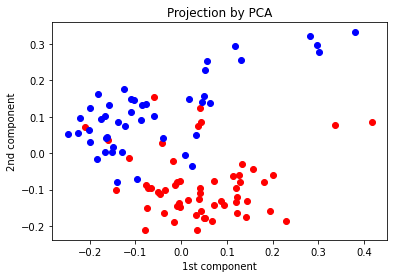

In [7]:
import matplotlib.pyplot as plt

reds = labels == "art" 
blues = labels == "music" 

plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

#Zad 8 
Dla pierwszych dziesięciu komponentów wiodących mamy zachowane tylko ok 16% wariancji, co jest niską wartością.

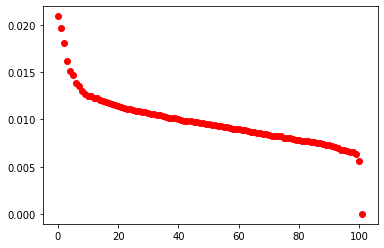

0.15773478029003496


In [8]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[0:10]))

#04 Cars

#Zad 1, 2
Dokonujemy standaryzacji zbioru, żeby wariancja była równa 1 a średnia 0.

In [25]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('./04cars-data.csv', header = 0)
data = df.iloc[:,9:]
array = data.values
scaled_array = StandardScaler().fit_transform(array)
attributes = df.columns.values[9:]
texts = df["Vehicle Name"]

In [22]:
np.std(scaled_array, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#Zad 3

In [10]:
cars_pca = PCA()
X_cars_pca = cars_pca.fit_transform(scaled_array)

Tutaj pierwszy komponent stanowi 60% całej wariancji, więc jest to wynik znacznie lepszy niż dla poprzedniego zbioru z artykułami.

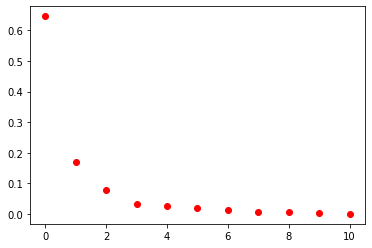

1.0


In [11]:
variance_ratio = cars_pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro', c="red")
plt.show()
print(sum(variance_ratio))

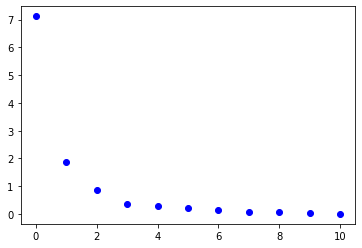

11.028497409326429


In [12]:
variance = cars_pca.explained_variance_
plt.plot(variance, 'ro', c="blue")
plt.show()
print(sum(variance))

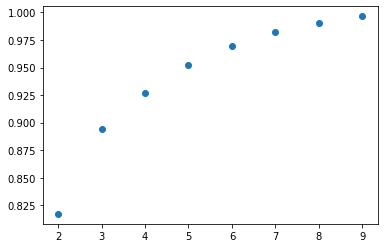

In [23]:
def get_explained_variance(scaled_array, n):
    cars_pca = PCA(n_components = n)
    cars_pca.fit_transform(scaled_array)
    return sum(cars_pca.explained_variance_ratio_)

variances = [get_explained_variance(scaled_array, n) for n in range(2, 10)]
plt.scatter(range(2,10), variances)
plt.show()

#Zad 4

Dla pierwszego komponentu największe wartości są dla City MPG i Hwy MPG i są to jedyne dodatnie wartości. Oznacza to, że ten komponent dzieli nam wyniki pod kątem MPG.

Drugi komponent ma wartości dodatnie dla Retail Price, Dealer Cost, HorsePower i Cylinders, który jest blisko zera. Dodatkowo wartości bliskie zeru to Engine Size, City MPG, Hwy MPG. Tutaj podział wyników jest ze względu na wartości fizyczne i koszt.

In [14]:
pc1 = cars_pca.components_[0]
pc2 = cars_pca.components_[1]
print('Attribute, PC1, PC2')
for i in range(0,pc1.shape[0]):
    print(attributes[i] + ':' + repr(pc1[i]) + ':' + repr(pc2[i]))

Attribute, PC1, PC2
Retail Price:-0.26375044344403425:0.46850869750253876
Dealer Cost:-0.26231863875309525:0.4701465851382257
Engine Size (l):-0.34708049202520086:-0.01534718646371358
Cyl:-0.3341887576286371:0.07803201087501868
HP:-0.31860225848402923:0.292213476139182
City MPG:0.3104817267323128:-0.003365935761659125
Hwy MPG:0.30658863858044433:-0.010964460145348687
Weight:-0.3363293669404879:-0.1674635715478704
Wheel Base:-0.26621003357105416:-0.4181771069592041
Len:-0.2567901876706822:-0.40841138066875465
Width:-0.29605459141706103:-0.312891350162507


#Zad 5
W lewnym górnym rogu mamy wartości odstające, są to samochody sportowe. Pojazdy po lewej stronie mają duże spalanie benzyny, czyli własnie samochody sportowe albo duże samochody typu Hummer H2. Jednak większośc pojazdów znajduje się mniej więcej na środku wykresu.

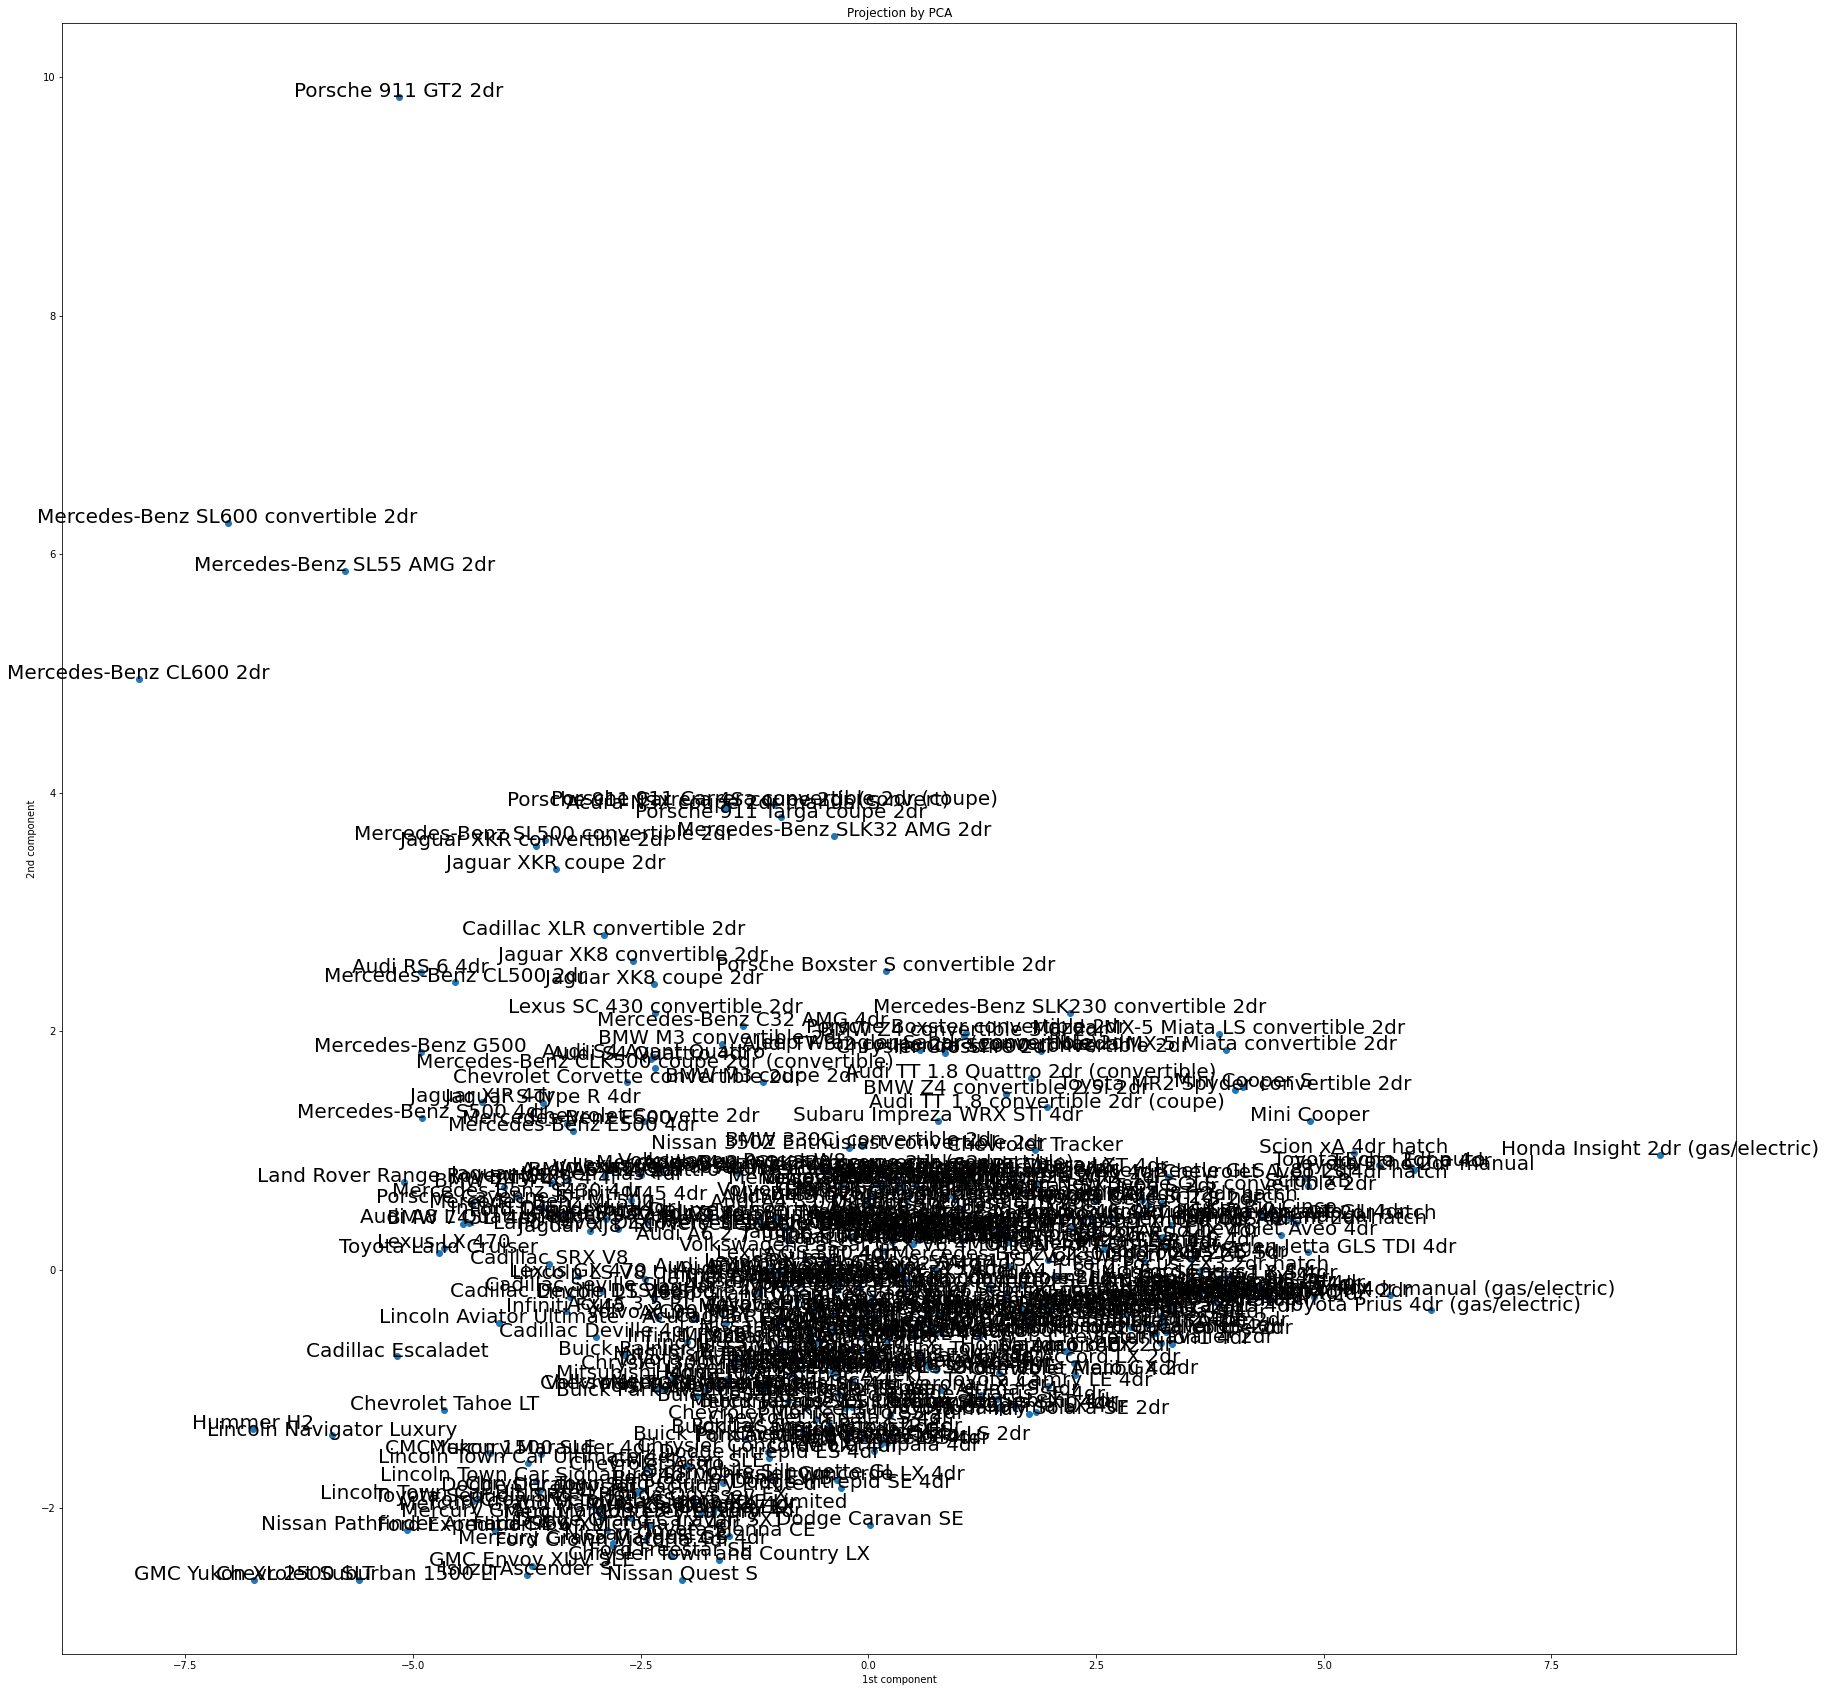

In [26]:
plt.figure(figsize=(30,30))
texts = df["Vehicle Name"]
plt.scatter(X_cars_pca[:,0], X_cars_pca[:,1])
for i, txt in enumerate(texts):
    plt.annotate(txt, (X_cars_pca[i][0], X_cars_pca[i][1]), ha="center", size=20)

plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

#Zad 6
Z takiej wizualizacji możemy odczytać, które atrybuty są ze sobą skorelowane. Kąt pomiędzy odcinkami dla City MPG i Hwy MPG, dla Retail Price i Dealer Cost oraz dla Wheel Base i Len są bardzo małe, co oznacza, że te atrybuty mocno od siebie zależą. 

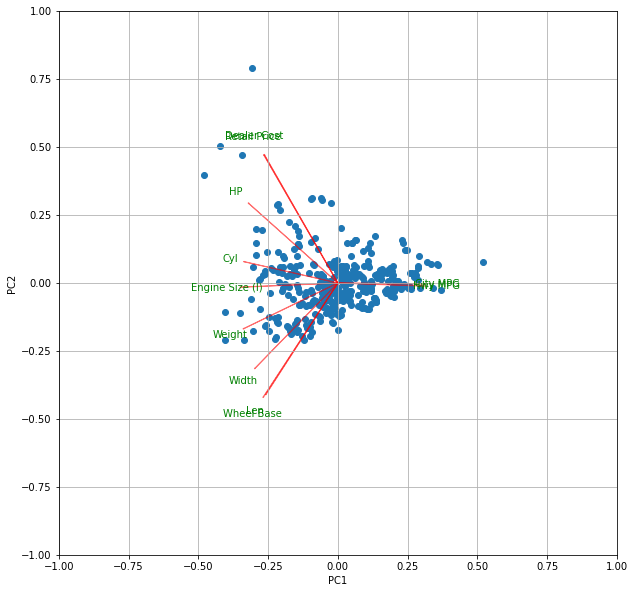

In [30]:
def biplot(score,coeff,pca1=0,pca2=1,labels=None):
    xs = score[:,pca1]
    ys = score[:,pca2]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex, ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5) 
        plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

plt.figure(figsize=(10,10))
score = X_cars_pca
coeff = cars_pca.components_[0:2,:].T
biplot(score, coeff, labels = data.columns)